### DM-08 Practice 1  

#### Import libraries  

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

#### Parameters  

In [15]:
csv_in = 'questionnaire-cafe.csv'

%config InlineBackend.figure_formats = {'png', 'retina'}  # for high-reso graph

#### Read CSV data  

In [16]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=4, header=0)
print(df.shape)
print(df.info())
display(df.head())

(15, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Appearance  15 non-null     int64
 1   Atmosphere  15 non-null     int64
 2   Staff       15 non-null     int64
 3   Taste       15 non-null     int64
 4   Price       15 non-null     int64
 5   Menu        15 non-null     int64
dtypes: int64(6)
memory usage: 848.0 bytes
None


,Appearance,Atmosphere,Staff,Taste,Price,Menu
0,3,3,4,5,5,4
1,4,1,3,3,2,3
2,5,5,4,4,4,4
3,3,1,2,5,4,4
4,3,3,3,4,5,5


#### Factor analysis  

In [17]:
fa = FactorAnalyzer(n_factors=2, rotation='varimax', method='ml')
fa.fit(df.values)

FactorAnalyzer(method='ml', n_factors=2, rotation='varimax', rotation_kwargs={})

#### Correlation matrix (相関行列)   

In [18]:
df_corr = df.corr(method='pearson')
display(df_corr)

,Appearance,Atmosphere,Staff,Taste,Price,Menu
Appearance,1.000000,0.595145,0.674770,0.195569,0.090012,0.291342
Atmosphere,0.595145,1.000000,0.731657,0.084490,0.314818,0.205057
Staff,0.674770,0.731657,1.000000,0.019627,0.110658,0.231756
Taste,0.195569,0.084490,0.019627,1.000000,0.764496,0.782361
Price,0.090012,0.314818,0.110658,0.764496,1.000000,0.656532
Menu,0.291342,0.205057,0.231756,0.782361,0.656532,1.000000


#### Eigenvalues (固有値)  

In [19]:
eigen_org, eigen_cf = fa.get_eigenvalues()
ser_eigen_org = pd.Series(eigen_org)
ser_eigen_cf = pd.Series(eigen_cf)
print(ser_eigen_org)
print(ser_eigen_cf)

0    2.924222
1    1.906445
2    0.554203
3    0.307722
4    0.184255
5    0.123153
dtype: float64
0    2.650281
1    1.666286
2    0.180248
3    0.035116
4   -0.022489
5   -0.196041
dtype: float64


#### Scree plot (スクリープロット)  

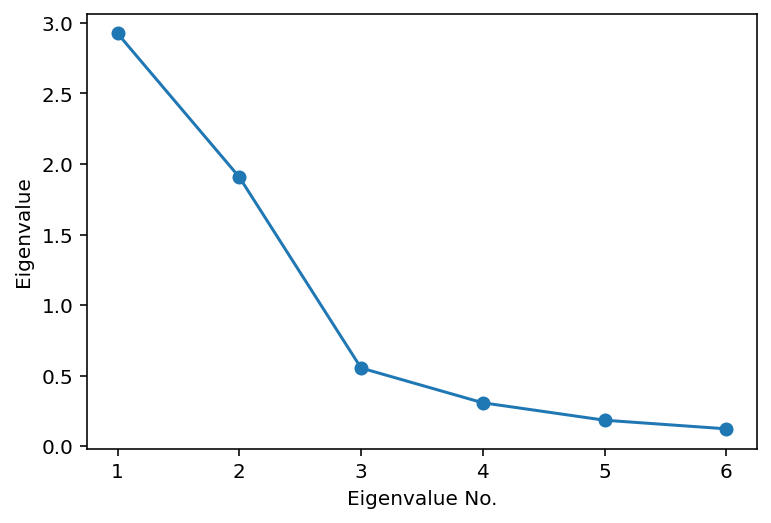

In [20]:
x = np.array(range(len(ser_eigen_org)))+1
plt.plot(x, ser_eigen_org, marker='o')
plt.xlabel('Eigenvalue No.')
plt.ylabel('Eigenvalue')
plt.show()

**Number of factors: two seems to be appropriate because the third eigenvalue is less than 1 and also the graph becomes gently-sloping at the third eigenvalue.**  
**3つめの固有値は1を下回っていて、かつそこからグラフがなだらかになっているので、因子数は2が良さそう**  

**Ans. 2**

#### Loadings (因子負荷量)  

In [21]:
loadings = fa.loadings_
df_loadings = pd.DataFrame(loadings, index=df.columns,
                           columns=['Factor1','Factor2'])
display(df_loadings)

,Factor1,Factor2
Appearance,0.195642,0.715441
Atmosphere,0.097082,0.790278
Staff,0.027299,0.929474
Taste,0.987632,-0.007768
Price,0.775356,0.113219
Menu,0.794324,0.210270


#### Scores (因子得点)  

In [22]:
scores = fa.transform(df)
df_scores = pd.DataFrame(scores, columns=['Factor1','Factor2'])
print(df_scores.shape)
display(df_scores.head())

(15, 2)


,Factor1,Factor2
0,1.389561,0.224993
1,-0.533255,-0.589580
2,0.473102,0.962855
3,1.377170,-1.643416
4,0.559475,-0.349041


#### Uniquenesses (独自因子の割合)  

In [23]:
uniqueness = fa.get_uniquenesses()
ser_uniqueness = pd.Series(uniqueness, index=df.columns)
print(ser_uniqueness)

Appearance    0.449868
Atmosphere    0.366035
Staff         0.135332
Taste         0.024523
Price         0.386005
Menu          0.324836
dtype: float64


**Not so high uniqueness for all data,  
so all data are somehow affected by the common factors**

#### Contribution of each factor (各共通因子の寄与)  
- SS Loadings: 因子負荷量平方和(因子寄与)  
- Proportion Var: 寄与率  
- Cumulative Var: 累積寄与率

In [24]:
fa_var = fa.get_factor_variance()
df_fa_var = pd.DataFrame(fa_var,
                         index=['var', 'prop_var', 'cum_var'],
                         columns=['Factor1', 'Factor2'])
display(df_fa_var)

,Factor1,Factor2
var,2.255990,2.057411
prop_var,0.375998,0.342902
cum_var,0.375998,0.718900


**71.9% of total variance can be considered by Factor1 and Factor2**  

**Ans. 71.9%**

In [25]:
# slightly modified from biplot() in pca_and_biplot.ipynb of DM-08
def biplot_fa(score_2d, loadings, load_labels=None):
    plt.figure(figsize=(10,10))
    r1 = 1.5
    r2 = 1.01
    if load_labels is None:
        load_labels = range(len(loadings))
    for i, coef in enumerate(loadings):
        plt.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        plt.text(coef[0]*r1*r2, coef[1]*r1*r2, load_labels[i],
                 color='b', fontsize=20)
    for i in range(len(score_2d)):
        m = '${}$'.format(i)
        plt.scatter(score_2d[i,0], score_2d[i,1], marker=m, s=500, c='k')
    plt.xlabel('F_1')
    plt.ylabel('F_2')
    plt.grid()
    return None

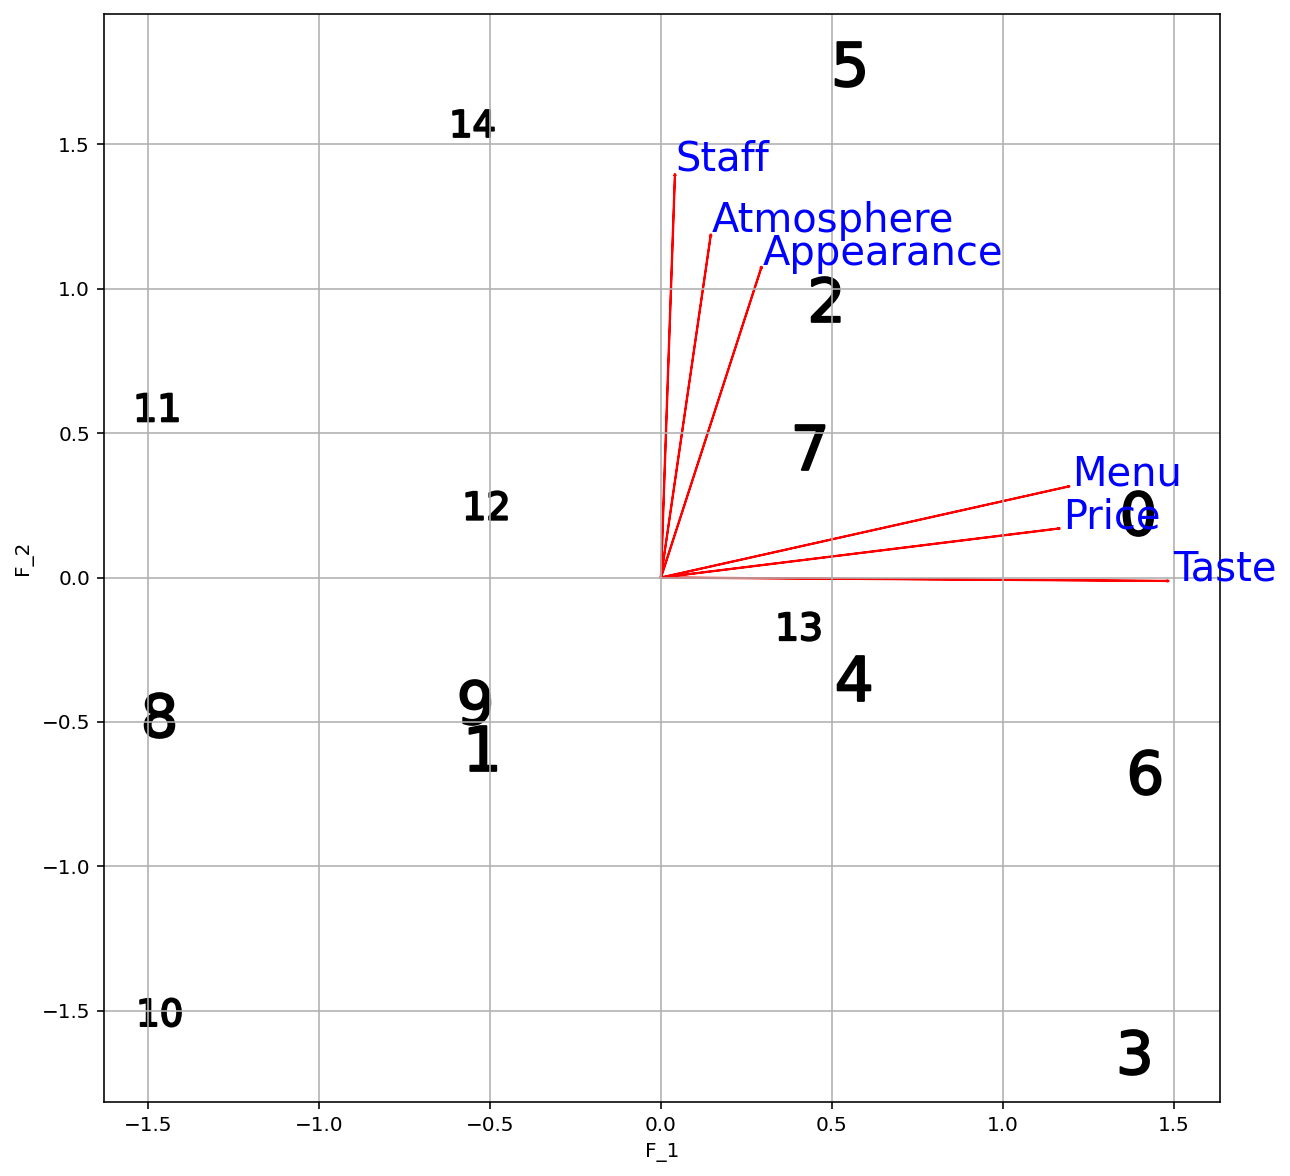

In [26]:
biplot_fa(scores, loadings, load_labels=df.columns)

**According to loading (>=0.5) and biplot,  
F_1: About coffee (offered items), F_2: About shop (environment).**

**No.0: positive to coffee, neutral to shop    
No.3: positive to coffee, negative to shop  
No.5: positive to both coffee and shop  
No.10: negative to both coffee and shop  
etc.**

**Ans. No.3: positive to coffee, negative to shop**  